## Estimación de un modelo VAR
* Precios de exportacion (var. % anual)
* Incertidumbre (pts.)
* Tipo de cambio nominal (var. % anual)
* Inversion privada real (var. % anual)
* Inflacion (%)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(["bmh"])
import statsmodels.tsa.api as tsa

In [28]:
dta = pd.read_excel("./data/data_f.xlsx", index_col="Date")

dta

,IPX,Depreciacion,Inflacion,VIX,PCA,Inversión privada
Date,,,,,,
2000-09-30,6.083613,3.359590,3.710886,-1.394488,-3.752284,-6.970631
2000-12-31,-1.458325,1.056022,4.001129,8.396691,0.361190,-3.419365
2001-03-31,-2.838051,1.666440,3.683259,7.856634,2.773724,-10.848616
2001-06-30,-2.367960,2.120980,2.587177,5.837952,-0.084390,-0.423988
2001-09-30,-4.549860,0.405307,1.465562,8.871052,0.864864,1.657060
...,...,...,...,...,...,...
2018-12-31,-5.890072,3.452416,2.066755,2.343259,-3.734627,1.140884
2019-03-31,-8.484282,2.611762,2.126855,-3.703055,-5.553353,2.908110
2019-06-30,-5.393379,1.905102,2.537244,-5.292294,-7.513162,5.603677


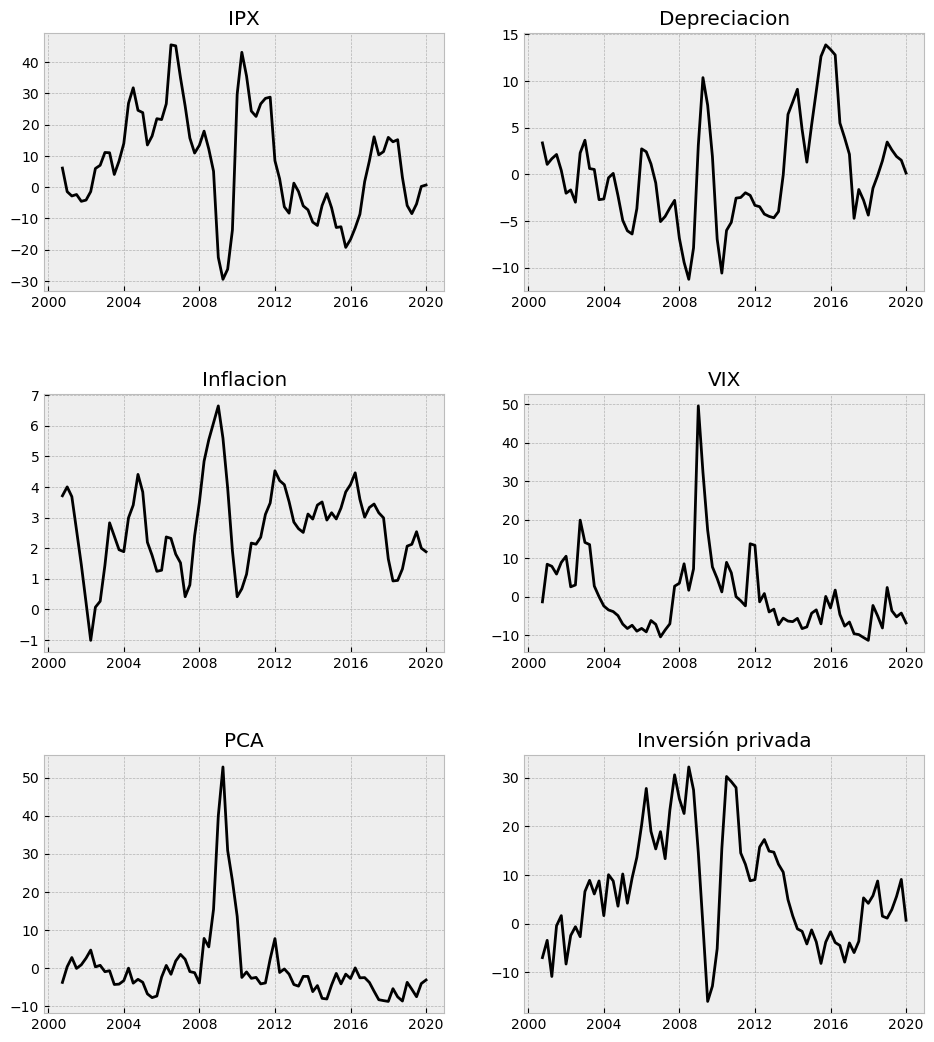

In [29]:
plt.figure(figsize=(16,14))
n=1

for i in dta.columns:
    ax = plt.subplot(3, 2, n)
    plt.plot(dta.index, dta[i], color="black")
    plt.title(i)
    plt.grid(True)
    n+=1

plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)
plt.show()

Definiremos los dos sets para la estimacion:

In [30]:
dta_vix = dta[["IPX", "VIX", "Depreciacion", "Inversión privada", "Inflacion"]]
dta_pca = dta[["IPX", "PCA", "Depreciacion", "Inversión privada", "Inflacion"]]

### Modelo VAR con VIX

In [31]:
df = dta_vix

In [32]:
model_var = tsa.VAR(df)
order = model_var.select_order(maxlags=4)

order.summary()

c:\Users\m_alv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,17.94,18.09,6.153e+07,18.00
1,12.66,13.60*,3.160e+05,13.03
2,12.31,14.02,2.237e+05*,12.99*
3,12.51,15.00,2.795e+05,13.50
4,12.29*,15.56,2.355e+05,13.59


Estimación con 1 rezago, siguiendo el criterio de información BIC

In [33]:
model_var = tsa.VAR(df).fit(maxlags=1)
print(model_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Dec, 2022
Time:                     18:41:46
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    13.5222
Nobs:                     77.0000    HQIC:                   12.9743
Log likelihood:          -1001.74    FPE:                    299736.
AIC:                      12.6091    Det(Omega_mle):         205969.
--------------------------------------------------------------------
Results for equation IPX
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        6.681440         2.379260            2.808           0.005
L1.IPX                       0.862945         0.086139           10.018           0.000
L1.VIX                      -0.028

c:\Users\m_alv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [34]:
irfs = model_var.irf(10)

Las IRFs ortogonales con bandas de 68% de confianza

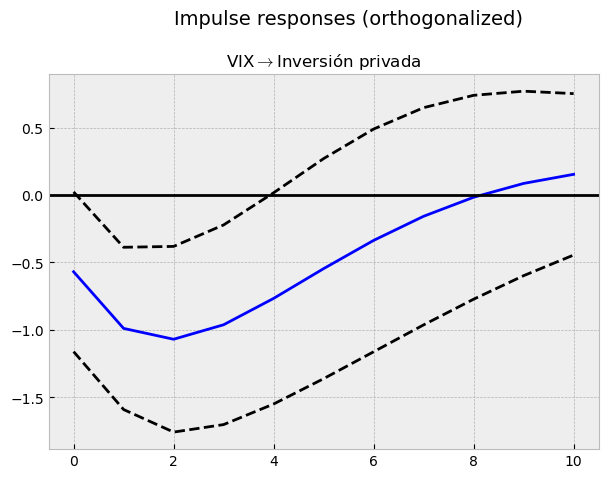

In [35]:
irfs.plot(
    impulse="VIX", response="Inversión privada", orth=True,
    signif=0.32, figsize=(10, 5),
    subplot_params={"fonsize": 10}
)

plt.subplots_adjust(top=0.85, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)
plt.savefig("./figures/irfs_vix_invpriv.pdf")
plt.show()

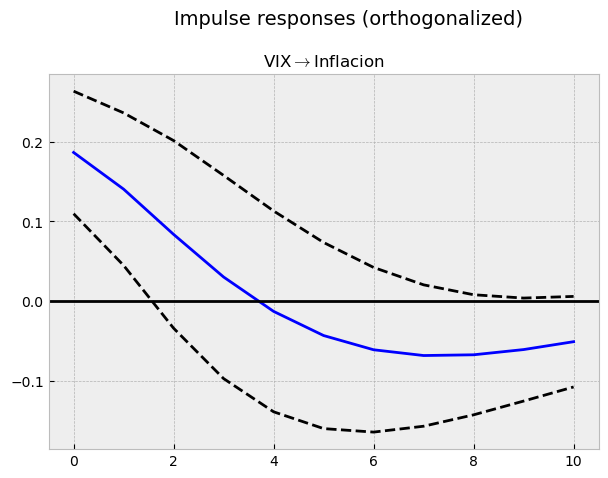

In [36]:
irfs.plot(
    impulse="VIX", response="Inflacion", orth=True,
    signif=0.32, figsize=(10, 5),
    subplot_params={"fonsize": 10}
)

plt.subplots_adjust(top=0.85, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)
plt.savefig("./figures/irfs_vix_inf.pdf")
plt.show()

### Modelo VAR con PCA

In [37]:
df = dta_pca

In [38]:
model_var = tsa.VAR(df)
order = model_var.select_order(maxlags=4)

order.summary()

c:\Users\m_alv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,17.91,18.06,5.971e+07,17.97
1,11.85,12.78*,1.403e+05,12.22*
2,11.58,13.29,1.084e+05*,12.27
3,11.65,14.14,1.187e+05,12.64
4,11.53*,14.80,1.098e+05,12.83


Estimación con 1 rezago, siguiendo el criterio de información BIC y HQ

In [39]:
model_var = tsa.VAR(df).fit(maxlags=1)
print(model_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Dec, 2022
Time:                     18:41:47
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    12.6826
Nobs:                     77.0000    HQIC:                   12.1346
Log likelihood:          -969.413    FPE:                    129439.
AIC:                      11.7694    Det(Omega_mle):         88946.7
--------------------------------------------------------------------
Results for equation IPX
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        7.356009         2.370354            3.103           0.002
L1.IPX                       0.897282         0.083988           10.683           0.000
L1.PCA                       0.152

c:\Users\m_alv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [40]:
irfs = model_var.irf(10)

Las IRFs ortogonales con bandas de 68% de confianza

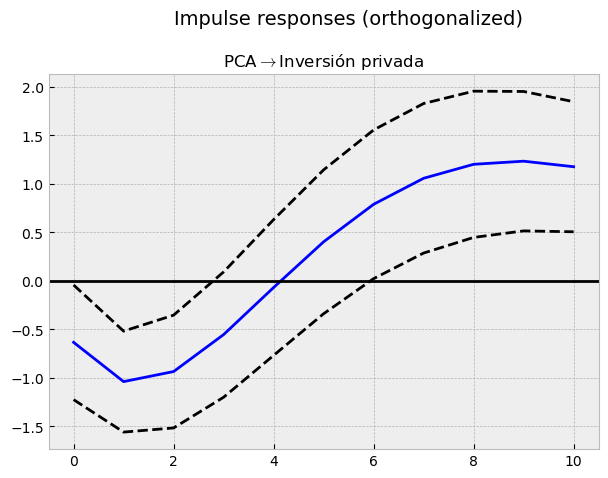

In [41]:
irfs.plot(
    impulse="PCA", response="Inversión privada", orth=True,
    signif=0.32, figsize=(10, 5),
    subplot_params={"fonsize": 10}
)

plt.subplots_adjust(top=0.85, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)
plt.savefig("./figures/irfs_pca_invpriv.pdf")
plt.show()

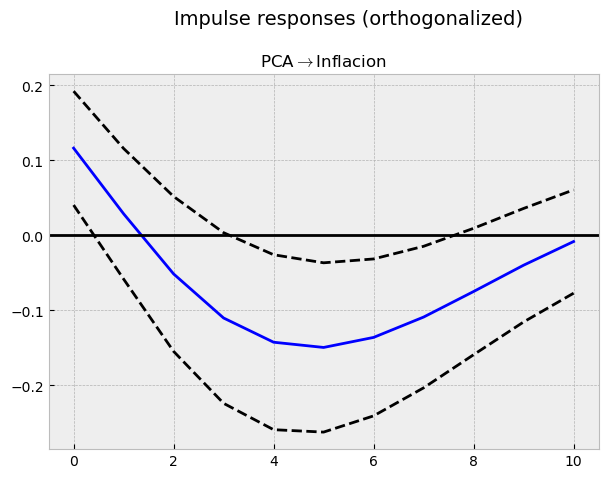

In [42]:
irfs.plot(
    impulse="PCA", response="Inflacion", orth=True,
    signif=0.32, figsize=(10, 5),
    subplot_params={"fonsize": 10}
)

plt.subplots_adjust(top=0.85, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)
plt.savefig("./figures/irfs_pca_inf.pdf")
plt.show()